In [54]:
apple_url = 'https://www.ebay.com/urw/Apple-Watch-Series-3-38-mm-Smartwatch-GPS-Only-Silver-Aluminum-Case-White-Sport-Band-MTEY2LL-A-/product-reviews/4026508995'
import requests
from bs4 import BeautifulSoup
#reviews = []
page = requests.get(apple_url)
soup = BeautifulSoup(page.text, 'html5lib')
#print(soup)
body = soup.find_all('p', {'class':'review-item-content rvw-wrap-spaces'})
#article_text = body.text
#print(body)
apple_prod = list()
for i in body:
    apple_prod.append(i.text)
    print(i.text,'\n')
#print(apple_prod)

print('-----------------------------------------------------------------------------------------------------------------------')
samsung_url = 'https://www.ebay.com/urw/Samsung-Galaxy-Gear-S3-Classic-46-mm-Stainless-Steel-Silver-Case-and-Black-Leather-Band-SM-R770NZSAXAR-/product-reviews/230279544?_itm=333237167489'
samsung_page = requests.get(samsung_url)
soup1 = BeautifulSoup(samsung_page.text, 'html5lib')
samsung_body = soup1.find_all('p', {'class':'review-item-content rvw-wrap-spaces'})
samsung_prod = list()
for i in samsung_body:
    samsung_prod.append(i.text)
    print(i.text,'\n')
#print(samsung_prod)



I’ve always wanted a Apple Watch and I am so happy with my purchase so far. I didn’t know it would take several hours to set up and download and update it but it was worth the wait. This is a very good deal. Brand new perfect condition. Still getting used to it but I feel like I’m going to love it.Read full review... 

Watch was legit Apple product. Packaging was fine, and box contained watch, charger and backup band. The hardware was Grade A refurbished, and it looked great, but......the watch's UI only responded properly when placed on a charger. As soon as my wife put it on her wrist, it would either not respond to certain touches and swipes, or it was extremely laggy. The OS may have been hosed somehow, but either way, it was a real Apple watch that didn't work well.Read full review... 

Product came in box with actual charger and extra brand no scratches better than first one I order the last one would only work sometimes screen kept freezing and glitching bad this one have a glit

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\S534804\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


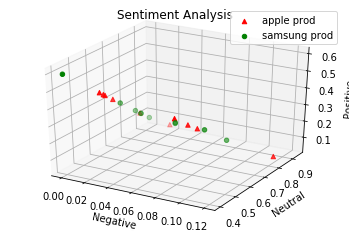

In [7]:
from nltk_helpers import get_sentiments, split_sentiments

# visualization part
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# build our figure
fig = plt.figure()
# build the axes
ax = fig.add_subplot(111, projection='3d')

appleX, appleY, appleZ = split_sentiments([get_sentiments(tweet) for tweet in apple_prod])
ax.scatter(appleX, appleY, appleZ, color = 'r', marker = '^', label = 'apple prod')

samX, samY, samZ = split_sentiments([get_sentiments(tweet) for tweet in samsung_prod])
ax.scatter(samX, samY, samZ, color = 'g', marker = 'o', label = 'samsung prod')


ax.set_xlabel('Negative')
ax.set_ylabel('Neutral')
ax.set_zlabel('Positive')
ax.legend()
plt.title('Sentiment Analysis')
plt.show()

In [9]:
import pickle

# create a file called data.pkl that we will write to in a binary format
with open('apple.pkl', 'wb') as f:
    pickle.dump(apple_prod, f)

In [10]:
with open('apple.pkl', 'rb') as f:
    apple_data = pickle.load(f)
#print(apple_data)


#print(apple)

In [11]:
def lexical_diversity(text):
    tokens = text.lower().split()
    return len(set(tokens))/len(tokens)


apple = apple_data[0]
tokens = apple.split()
lower_tokens = [s.lower() for s in tokens]
print(lower_tokens)
unique_lower = set(lower_tokens)
print(unique_lower)
print('Lexical Diversity:', len(unique_lower)/len(lower_tokens))

['i’ve', 'always', 'wanted', 'a', 'apple', 'watch', 'and', 'i', 'am', 'so', 'happy', 'with', 'my', 'purchase', 'so', 'far.', 'i', 'didn’t', 'know', 'it', 'would', 'take', 'several', 'hours', 'to', 'set', 'up', 'and', 'download', 'and', 'update', 'it', 'but', 'it', 'was', 'worth', 'the', 'wait.', 'this', 'is', 'a', 'very', 'good', 'deal.', 'brand', 'new', 'perfect', 'condition.', 'still', 'getting', 'used', 'to', 'it', 'but', 'i', 'feel', 'like', 'i’m', 'going', 'to', 'love', 'it.read', 'full', 'review...']
{'several', 'love', 'and', 'my', 'to', 'with', 'it', 'is', 'perfect', 'going', 'am', 'purchase', 'full', 'i’ve', 'brand', 'used', 'new', 'up', 'was', 'review...', 'a', 'download', 'deal.', 'know', 'condition.', 'the', 'hours', 'i', 'getting', 'so', 'wait.', 'good', 'always', 'worth', 'this', 'take', 'apple', 'i’m', 'watch', 'happy', 'still', 'like', 'set', 'feel', 'it.read', 'update', 'would', 'but', 'very', 'didn’t', 'far.', 'wanted'}
Lexical Diversity: 0.8125


In [12]:
print(lexical_diversity(apple))

0.8125


In [13]:
import pickle

# create a file called data.pkl that we will write to in a binary format
with open('samsung.pkl', 'wb') as f:
    pickle.dump(samsung_prod, f)

In [14]:
with open('samsung.pkl', 'rb') as f:
    samsung_data = pickle.load(f)

In [15]:
samsung = samsung_data[5]
tokens = samsung.split()
lower_tokens = [s.lower() for s in tokens]
print(lower_tokens)
unique_lower = set(lower_tokens)
print(unique_lower)
print('Lexical Diversity:', len(unique_lower)/len(lower_tokens))

['last', 'smartwatch', 'to', 'have', 'samsung', 'pay', 'with', 'mst', 'technology', '(even', 'works', 'at', 'non-nfc', 'pay', 'terminals)!', 'classy', 'looks,', 'and', 'has', 'the', 'same', 'updated', 'tizen', '4.0', 'os', '(same', 'as', 'recent', 'release', 'galaxy', 'watch)!']
{'at', 'and', 'to', 'last', 'with', '(even', 'release', 'updated', 'has', '4.0', 'mst', 'technology', '(same', 'recent', 'smartwatch', 'samsung', 'looks,', 'as', 'the', 'non-nfc', 'works', 'terminals)!', 'classy', 'pay', 'galaxy', 'watch)!', 'tizen', 'os', 'same', 'have'}
Lexical Diversity: 0.967741935483871


In [16]:
print(lexical_diversity(samsung))

0.967741935483871


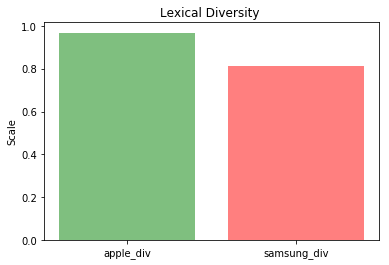

In [17]:
import matplotlib.pyplot as plt
import numpy as np
objects = ('apple_div','samsung_div')
y_pos = np.arange(len(objects))
performance = [lexical_diversity(samsung), lexical_diversity(apple)]

plt.bar(y_pos, performance, align='center', alpha=0.5 , color=['green','red'])
plt.xticks(y_pos, objects)
plt.ylabel('Scale')
plt.title('Lexical Diversity ')

plt.show()

In [1]:
APPLE_URL = 'https://www.ebay.com/p/Apple-Watch-Series-3-38-mm-Smartwatch-GPS-Only-Silver-Aluminum-Case-White-Sport-Band-MTEY2LL-A/4026508995?iid=323836138945#UserReviews'

import requests
from bs4 import BeautifulSoup
page = requests.get(APPLE_URL)
soup = BeautifulSoup(page.text, 'html5lib')
body = soup.find('div', {'class':'description'})
article_text = body.text
print(article_text)

Product IdentifiersBrandAppleMPNMTEY2LL/AGTIN0190198805843ModelApple Watch Series 3eBay Product ID (ePID)4026508995Product Key FeaturesBand MaterialFluoroelastomerCase MaterialAluminumStorage Capacity8 GBManufacturer Band ColorWhiteFeaturesAltimeter, Accelerometer, Bluetooth Enabled, Water-Resistant, Heart Rate Monitor, Gyroscope, GPSBand ColorWhiteSeriesApple Watch Series 3Case Size38 mmCompatible Operating SystemiOS - AppleOperating SystemApple Watch OS


In [3]:
import pickle
with open('apple_text.pkl', 'wb') as f:
    pickle.dump(article_text, f)

In [41]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt
import random

In [42]:
with open('apple_text.pkl', 'rb') as f:
    words = pickle.load(f)

In [43]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

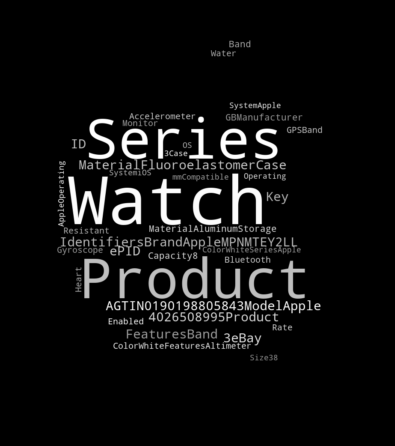

In [44]:
mask = np.array(Image.open(requests.get('https://cdn.macrumors.com/images-new/apple-logo.jpg', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 312, height = 312, background_color='black', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(8,6),facecolor = 'black', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.imshow(word_cloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(words, mask)

In [49]:
import requests
from bs4 import BeautifulSoup
Samsung_url ='https://en.wikipedia.org/wiki/Samsung_Gear_S3'
samsung_page = requests.get(Samsung_url)
soups = BeautifulSoup(samsung_page.text, 'html5lib')
#print(soups)
samsung_body = soups.find('table')
sams_text = samsung_body.text
print(sams_text)

Samsung Gear S3Gear S3 Frontier and ClassicDeveloperSamsung ElectronicsManufacturerSamsung ElectronicsProduct familySamsung GearTypeSmartwatchOperating systemTizen Version 4.0.0.2Display1.3" Super AMOLED, 360 x 360 pixelsInputCapacitive touchPower380 mAh, Qi inductive coil wireless chargingPredecessorSamsung Gear S2SuccessorSamsung Galaxy Watch


In [50]:
import pickle
with open('samsung_text.pkl', 'wb') as f:
    pickle.dump(sams_text, f)

In [51]:
with open('samsung_text.pkl', 'rb') as f:
    words = pickle.load(f)

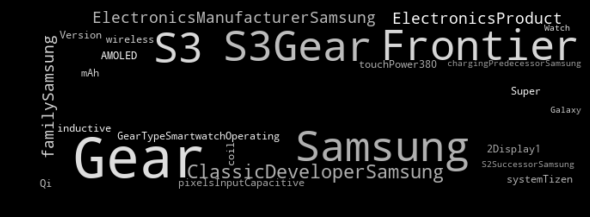

In [52]:
mask = np.array(Image.open(requests.get('http://pluspng.com/img-png/samsung-logo-png-file-samsung-logo-black-svg-640.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 312, height = 312, background_color='black', stopwords=STOPWORDS, mask=mask).generate(word)
    plt.figure(figsize=(8,6),facecolor = 'black', edgecolor='white')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.imshow(word_cloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(word, mask)